# Logistic Regression with Regularization

        Agreements: we write Docstring inside functions for the case when we invoke the function and push Shift + Tab, it will tell you what should be the dimentions of the inputs.

# 1. Loading and Visualization

In [1]:
import numpy as np

In [2]:
data = np.genfromtxt('ex2data2.txt', delimiter = ',')

In [3]:
data

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [4]:
y_1 = data[data[:, 2] == 1]
y_0 = data[data[:, 2] == 0]

In [5]:
import matplotlib.pyplot as plt

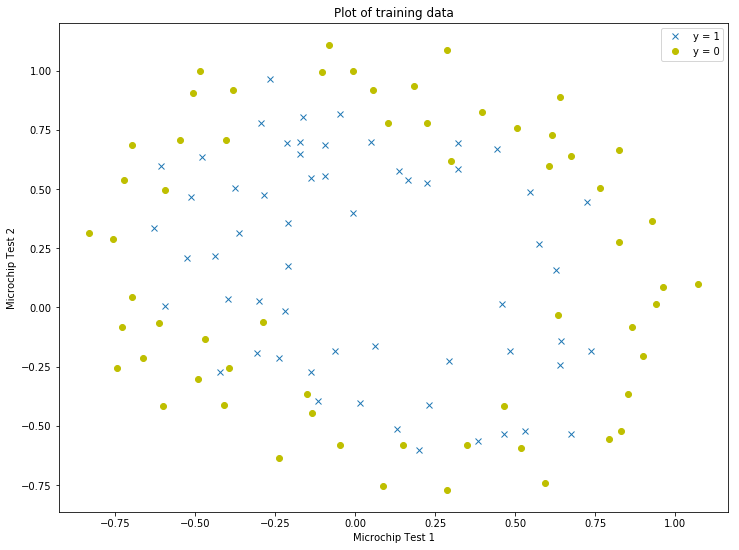

In [8]:
plt.plot(y_1[:,0], y_1[:,1], 'x')
plt.plot(y_0[:,0], y_0[:,1], 'yo')
plt.title("Plot of training data")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(('y = 1', 'y = 0'))

In [9]:
#To change the size of the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

    Rerun your code to see the bigger picture!

# 2. Preprocessing of data

> Sven Marnach from Stack Overflow: "NumPy's transpose() effectively reverses the shape of an array. If the array is one-dimensional, this means it has no effect. It is necessary to deal with matrix type of numpy"

In [10]:
Y = (data[:,2]).T

In [11]:
Y.shape

(118,)

In [12]:
(Y.T).shape

(118,)

In [13]:
m = len(data[:,0]) #sample size

## 2.1 Feature mapping

        Since theta0 + theta1*x1 + theta*x2 = 0 is creating straight line, it is not enough to cover our trend. Thus, it has been decided to creat new features so that it would be quasi-circle, which means there should be degrees. Andrew NG proposes that there should be degrees up to 6, meaning there are 28 combinations of x1 and x2 (and one x0).

In [14]:
#Degrees should be 6

degree_list = []
degrees = 6
for i in range(7):
    for j in range(7):
        x1x2 =[]
        if i+j <= 6:
            x1x2.append(i)
            x1x2.append(j)
            degree_list.append(x1x2)

In [15]:
len(degree_list)

28

In [16]:
n = len(degree_list) #feature size

    Comment on result: there are 28 combinations as it has been required.

## 2.2 Creation of X (118 x 28)

In [17]:
#Empty list creation: np.zeros or np.ones
X = np.zeros(shape = (n,m))

In [18]:
X.shape

(28, 118)

In [19]:
#Values of initial x1 and x2
x1 = data[:,0]
x2 = data[:,1]

In [20]:
x1.shape

(118,)

In [21]:
x1

array([ 0.051267 , -0.092742 , -0.21371  , -0.375    , -0.51325  ,
       -0.52477  , -0.39804  , -0.30588  ,  0.016705 ,  0.13191  ,
        0.38537  ,  0.52938  ,  0.63882  ,  0.73675  ,  0.54666  ,
        0.322    ,  0.16647  , -0.046659 , -0.17339  , -0.47869  ,
       -0.60541  , -0.62846  , -0.59389  , -0.42108  , -0.11578  ,
        0.20104  ,  0.46601  ,  0.67339  , -0.13882  , -0.29435  ,
       -0.26555  , -0.16187  , -0.17339  , -0.28283  , -0.36348  ,
       -0.30012  , -0.23675  , -0.06394  ,  0.062788 ,  0.22984  ,
        0.2932   ,  0.48329  ,  0.64459  ,  0.46025  ,  0.6273   ,
        0.57546  ,  0.72523  ,  0.22408  ,  0.44297  ,  0.322    ,
        0.13767  , -0.0063364, -0.092742 , -0.20795  , -0.20795  ,
       -0.43836  , -0.21947  , -0.13882  ,  0.18376  ,  0.22408  ,
        0.29896  ,  0.50634  ,  0.61578  ,  0.60426  ,  0.76555  ,
        0.92684  ,  0.82316  ,  0.96141  ,  0.93836  ,  0.86348  ,
        0.89804  ,  0.85196  ,  0.82892  ,  0.79435  ,  0.5927

In [22]:
degree_list

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [4, 0],
 [4, 1],
 [4, 2],
 [5, 0],
 [5, 1],
 [6, 0]]

In [23]:
#Creating the new X
for k in range(n):
    for j in range(m):
        X[k,j] = (x1[j] ** degree_list[k][0])  *  (x2[j] ** degree_list[k][1])

In [24]:
X.shape

(28, 118)

In [25]:
np.max(X)

1.8593206849359922

    Comment on result: as it can be seen no need to normalize, because no big numbers in X.

## 2.3 Initialization of theta

    Since we have 28 features, we need to have 28 thetas.

In [26]:
def theta_init():
    return np.zeros(shape=(n,))

### The most important note from the exercise: 
* if a = np.zeros(shape = (n,1)), then a.shape is (n,1) or a = [[1],[1],[1]]
* if b = np.zeros(shape = (n,)), then b.shape is (n,) or b = array([1,1,1])

    This affecting the whole afterwords procedures. For example, cost function outputs array([0.693]) for a above, while 0.693 for b above.

In [27]:
Theta = theta_init()

In [28]:
Theta.shape

(28,)

## 2.4 Sigmoid function, which is our hypothesis

In [29]:
X.shape

(28, 118)

In [30]:
Theta.shape

(28,)

In [31]:
def sigmoid(x,theta):
    """
    x.shape should be (n,m)
    theta.shape should be (n,1)
    output has (m,1) shape
    """
    z = x.T @ theta
    return 1/(1 + np.exp(-z))

### 2.4.1 Hypothesis before GDS

In [32]:
H_before = sigmoid(X,Theta)

In [33]:
H_before.shape

(118,)

In [34]:
H_before

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5])

# 3. Imlementation

## 3.1 Cost Function

In [35]:
def cost(x, theta, y, lamb):
    """
    x.shape should be (n,m)
    theta.shape should be (n,1)
    y.shape should be (m,1)
    """
    h = sigmoid(x, theta)
    Cost = (-1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    Reg_term = lamb/(2*m) * np.sum(theta ** 2)
    return Cost + Reg_term

### 3.1.1 Initial Value of Cost

In [36]:
cost(X,Theta,Y,0)

0.6931471805599453

> Andrew NG: cost for initial theta with zeros and lamb = 0 should be 0.693

## 3.2 Gradient Descent Function

In [37]:
def GDS(x, theta, y, lamb, alpha):
    """
    x.shape should be (n,m)
    theta.shape should be (n,1)
    y.shape should be (m,1)
    """
    dif = (1/m) * x @ (sigmoid(x,theta) - y) #classical differentiation term, output is (n,1)
    dif_reg = (lamb/m) * theta
    return (dif + dif_reg) * alpha

# !RERUN CODE FROM HERE TO SEE HOW HYPERPARAMETERS AFFECT!

## 3.3 Gradient Descent Function Implementation

We write an algorithm: 
* which will stop when there is no increase in Cost Function
* saves Cost Function values for each of the iteration to which alpha speeds up the learning
* and obtain the updated values for theta

### Set the hyperparameters for training

In [38]:
iterations = 2000 #it will stop by itslef 
alpha = 0.5 #choose among 0.1, 0.01, 0.3, 0.03

### Set the values for lambda:
* lambda = 1 should give proper decision boundary
* lambda = 0 (no regularization) should give Overfitting for decision boundary
* lambda = 100 should give Underfitting for decision boundary
##### All based on Andrew NG classes "Machine Learning"

In [39]:
lamb = 1

    It is important to start with zero theta, so:

In [40]:
Theta = theta_init()

In [41]:
Theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
#Set the number of iterations
iterations_list = []
cost_list = []
previous_cost = 0

for i in range(iterations):
    Cost_current  = cost(X, Theta, Y, lamb)
    Theta = Theta - GDS(X,Theta, Y,lamb,alpha)
    
    if (abs(Cost_current - previous_cost) <= 0.000000000000000000000000000000000000001):
        iteration_break = i
        break
    else:
        cost_list.append(Cost_current)
        iterations_list.append(i)
        previous_cost = Cost_current

# 4. Final Results

In [43]:
Theta

array([ 1.14213154,  1.16717811, -1.26951313, -0.17376423, -1.16315373,
       -0.46911873, -0.93200838,  0.6013209 , -0.91570891, -0.34519949,
       -0.26931737, -0.28695652, -0.13795885, -1.87174404, -0.36873219,
       -0.60641613, -0.28027414, -0.32896735,  0.12668334, -0.04858478,
       -0.04320504,  0.01735018, -1.42385895, -0.20708103, -0.29262298,
       -0.24309552,  0.02921495, -1.03618113])

In [44]:
iteration_break

NameError: name 'iteration_break' is not defined

        The code above outputs error because there was no saved value for the iteration_break variable, meaning the loop has gone through all over 2000 iterations with all slight changes.

In [45]:
cost_list

[0.6931471805599453,
 0.6869833192996765,
 0.6816317415479448,
 0.676878545372207,
 0.6725761849965621,
 0.6686223921049906,
 0.6649456399500481,
 0.6614952540064235,
 0.6582347345862195,
 0.6551372644102014,
 0.652182688748615,
 0.649355483026774,
 0.6466433810932383,
 0.6440364453165021,
 0.6415264324239687,
 0.6391063576773434,
 0.6367701924350768,
 0.6345126517567298,
 0.6323290430793849,
 0.6302151565654427,
 0.6281671840971405,
 0.6261816581469803,
 0.6242554045957314,
 0.6223855054724968,
 0.6205692688678187,
 0.6188042041291596,
 0.6170880010270104,
 0.6154185119716354,
 0.6137937366267535,
 0.6122118084483986,
 0.6106709828023644,
 0.6091696264004547,
 0.6077062078566018,
 0.606279289207093,
 0.6048875182702592,
 0.6035296217437776,
 0.6022043989547965,
 0.6009107161911171,
 0.5996475015518219,
 0.598413740263869,
 0.5972084704177759,
 0.5960307790810092,
 0.5948797987523424,
 0.5937547041244097,
 0.5926547091251364,
 0.5915790642117424,
 0.5905270538936596,
 0.589497994463083

In [46]:
len(iterations_list)

2000

## 4.1 Cost and Alpha value

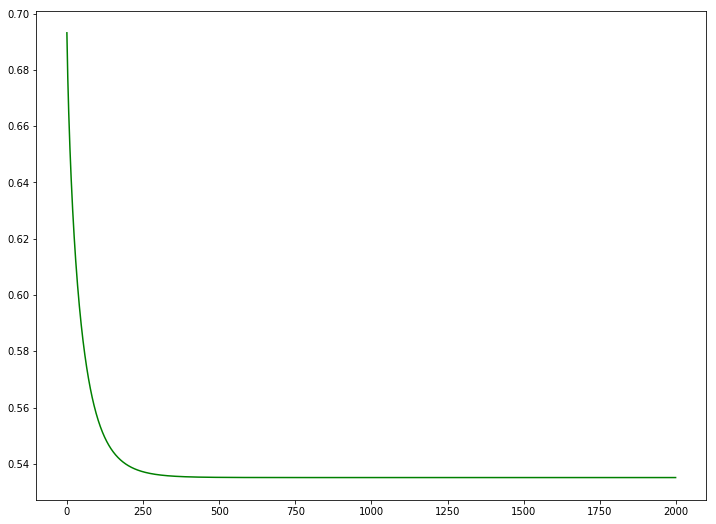

In [47]:
plt.plot(iterations_list, cost_list, 'g')

        Try to change the value of alpha to see how it accelerates the Cost function (the learning curve). The most appropriate that has been found was 0.5.

## 4.2 Updated Hypothesis Function

In [48]:
Theta

array([ 1.14213154,  1.16717811, -1.26951313, -0.17376423, -1.16315373,
       -0.46911873, -0.93200838,  0.6013209 , -0.91570891, -0.34519949,
       -0.26931737, -0.28695652, -0.13795885, -1.87174404, -0.36873219,
       -0.60641613, -0.28027414, -0.32896735,  0.12668334, -0.04858478,
       -0.04320504,  0.01735018, -1.42385895, -0.20708103, -0.29262298,
       -0.24309552,  0.02921495, -1.03618113])

In [49]:
Theta.shape

(28,)

In [50]:
H_after = sigmoid(X, Theta)

In [51]:
H_after

array([0.68665358, 0.70643403, 0.68945992, 0.71638253, 0.63905425,
       0.60726404, 0.64791328, 0.6105216 , 0.6128366 , 0.56204595,
       0.52098767, 0.50624134, 0.56532892, 0.46906238, 0.61602946,
       0.69935015, 0.7608509 , 0.55406664, 0.68983175, 0.61756565,
       0.51782778, 0.52195714, 0.47542822, 0.50000289, 0.58184793,
       0.49887134, 0.52234157, 0.39124905, 0.76617201, 0.58450453,
       0.2458584 , 0.57895193, 0.72317115, 0.7518891 , 0.72341049,
       0.69320048, 0.63173144, 0.69562143, 0.72262636, 0.63237749,
       0.70611919, 0.67777255, 0.58666508, 0.72389669, 0.62801512,
       0.66253838, 0.41393926, 0.75529215, 0.55131805, 0.60664587,
       0.75141646, 0.79500319, 0.7681277 , 0.77322691, 0.75515255,
       0.67130249, 0.70936848, 0.6401429 , 0.23883679, 0.53609754,
       0.6845891 , 0.36371244, 0.28584918, 0.46733266, 0.30479095,
       0.10701566, 0.31045266, 0.10234125, 0.13847271, 0.26842247,
       0.19453747, 0.23630583, 0.21209721, 0.23860944, 0.27780

## 4.3 Accuracy 

        The accuracy has been found with the help of numpy functions ('>=' and '==' conditionals and np.mean() method which outputs how many of True statements are there from total.

In [52]:
H_class_1 = (H_after >= 0.5)

In [53]:
Y_class_1 = (Y == 1)

In [54]:
np.mean(H_class_1 == Y_class_1) * 100

82.20338983050848

## 4.3.1 Table of Results

In [55]:
import pandas as pd

In [56]:
alpha_list = [0.1, 0.01, 0.3, 0.03, 0.5, 0.05]

In [57]:
lamb_list = [1, 0, 100]

In [58]:
accuracy_list = [83.05084745762711, 81.35593220338984, 60.16949152542372]

In [59]:
meaning = ["Desired", "No regularization (Overfitting)", "Too much regularization (Underfitting)"]

In [60]:
np.max(Theta)

1.1671781051740484

In [61]:
theta_mean = [-0.3324143715569239, -0.015543186291137713, -0.015543186291137713]
theta_max = [1.1232514267929568, 2.0236760156404943,0.00641955797494988]

In [62]:
table = []
table.append(lamb_list)
table.append(accuracy_list)
table.append(meaning)
table.append(theta_mean)
table.append(theta_max)

In [63]:
table_np = np.array(table)

In [64]:
main = table_np.T

In [65]:
df = pd.DataFrame(main, columns = ['Lambda', 'Accuracy', 'Meaning', 'Mean of Theta', 'Max of Theta'])

In [66]:
df

,Lambda,Accuracy,Meaning,Mean of Theta,Max of Theta
0,1,83.05084745762711,Desired,-0.3324143715569239,1.1232514267929568
1,0,81.35593220338984,No regularization (Overfitting),-0.015543186291137713,2.0236760156404943
2,100,60.16949152542372,Too much regularization (Underfitting),-0.015543186291137713,0.00641955797494988


# The End.